# Problema X Termodinámica

### Definición de los sistemas y entorno 
Se tiene un sistema cerrado formado por un globo de goma elástica lleno de hidrógeno. 
El sistema de hidrógeno encerrado por el globo (sistema $h$ en lo sucesivo) está envuelto por aire en condiciones ambiente. El aire de este entorno está encerrado por un cilindro ($c$) con émbolo ($E$), conformando otro sistema cerrado. El sistema de aire (sistema $a$ en lo sucesivo) y el sistema $h$ de su interior, se encuentran rodeados por una atmósfera de aire de condiciones conocidas.

### Datos Geométricos y Estructurales conocidos
- **Fronteras del Sistema $a$ **
    - Cilindro ($c$):
        - $L_0=30cm$ (altura total del cilindro)
        - $\phi_c=20cm$ (diámetro total del cilindro)
        - Cilindro perfecto, indeformable y sin rozamiento con el émbolo
        - El cilindro es perfectamente diatérmano
    - Émbolo ($e$):
        - Espesor despreciable ($\delta_e\approx0$)
        - $\phi_e=20cm=\phi_c$ (diámetro total del émbolo)
        - Émbolo perfecto, sin rozamiento e indeformable, que encaja perfectamente en el cilindro
        - El émbolo es perfectamente diatérmano
        - El émbolo tiene una masa $m_e$ desconocida
- ** Fronteras del Sistema $h$**
    - El material elástico del que está hecho el globo tiene una masa de $m_g=2g$
    - La masa de globo $m_g$ ocupa un volumen despreciable
    - El globo de goma tiene un diámetro mínimo $\phi_{h_0}$ hasta el cual no se aplica sobrepresión alguna en su interior. A partir de ahí se sigue una relación lineal (ley elástica) tal que por cada centímetro de variación de diámetro se requieren 15 mmHg de sobrepresión: $$\Delta P=k·(\phi_{h_1}-\phi_{h_0}) $$ Donde
        - $\phi_{h_0}=5 cm \equiv$ Diámetro mínimo
        - $\phi_{h_1}=15cm \equiv$ Diámetro inicial
        - $k=15 \frac {mmHg}{cm} \equiv$ Constante Elástica
   <img src='../static/figure_elasticlaw.png' alt="Drawing" style="width: 350px;"/>
    - El globo se considera perfectamente diatérmano
    - En todo momento consideraremos que el globo es esférico e indeformable, de diámetro variable


### Datos Termodinámicos y Propiedades Termodinámicas Iniciales
- **Entorno:**
    - Atmósfera de aire, ideal
        - Temperatura inicial: $T_\infty=15ºC$
        - Presión inicial: $P_\infty=1bar$
- **Sistema $a$:**
    - Aire en condiciones atmósfericas inicialmente
    - Émbolo a distancia $L_1 = L_0$ de la base del cilindro inicialmente
- **Sistema $h$:**
    - Globo con diámetro $\phi_{h_1}$ inicialmente
- **Propiedades termodinámicas y constantes**:        
    - Aire como gas ideal:
        - Se asume aire compuesto al $78\% N_2$ y $22\% O_2$
        - Masas moleculares disponibles: $M_N=14 \frac{g}{mol}$ y $M_O=16 \frac{g}{mol}$
        - Coeficiente de dilatación adiabático: $\gamma_a=1.4$
    - Hidrógeno como gas ideal:
        - Masa molecular del hidrógeno: $M_H=1 \frac{g}{mol}$
        - Coeficiente de dilatación adiabático: $\gamma_h=1.411$
    - Constante universal de los gases ideales: $\overline{R}=8.3114 \frac{J}{mol·K}$

### Proceso Termodinámico y Apartados
|Estado Inicial:                                            | Estado Final:|
|-----------------------------------------------------------|--------------|
|- Sistema $a$ en condiciones atmosféricas y  émbolo a $L_0$| Se suelta el émbolo y se deja llegar al equilibrio termodinámico a los sistema $a$ y $h$|
|- Globo a $\phi_{h1}$                                      | El proceso es rápido. Se deja suficiente tiempo  hasta el atemperamiento de todos los sistemas|
Se pide obtener:
1. Propiedades termodinámicas que resuelven el estado inicial de ambos sistemas
2. Condición de flotabilidad del globo en función de la masa del émbolo $m_e$

### **Primer Paso:** Conversión de los datos a Sistema Internacional y obtención de las constantes básicas
En primer lugar, se calculan las constantes de los gases a partir de la constante universal y las masas moleculares. Todas las unidades se pasan a SI. Todas. Sin excepción!

##### Obtención de las Constantes de los Gases

In [1]:
## Constantes de los Gases:
# Masas moleculares
M_O = 16 #g/mol  - Masa molecular del oxígeno
M_N = 14 #g/mol  - Masa molecular del nitrógeno
M_H = 1 #g/mol  - Masa molecular del hidrógeno

M_a = 0.78*2*M_N + 0.22*2*M_O #masa molecular del aire en g/mol
M_h = 2*M_H #masa molecular del sistema hidrógeno (diatómico) en g/mol

# Constante de los Gases
R_u = 8.3114 #J/mol/K  - Constante universal de los gases
R_a = R_u/M_a * 1000 #J/kg/K
R_h = R_u/M_h * 1000 #J/kg/K

##### Ley Elástica y Condiciones Iniciales del Globo


In [2]:
import numpy as np

In [3]:
#Ley elástica del globo
mmHg2Pa = 101325/760 #conversión de mmHg a Pa
K = 15*mmHg2Pa*100 #constante elástica en Pa/m
phi_h0 = 0.05 #diámetro mínimo en m

In [4]:
def delta_p(phi_h):
    if phi_h<=phi_h0:
        return 0
    else:
        return K*(phi_h - phi_h0)

In [5]:
#Obtención del volumen inicial del globo:
phi_h1 = 0.15 #diámetro inicial del globo en metros
V_h1 = np.pi/6*(phi_h1**3) # Volumen inicial del sistema de hidrógeno (globo) en m3

#Masa del globo
m_g = 0.002 #kg
    
#Condiciones Ambiente:
T_inf = 15 + 273.15 #Temperatura ambiente en K
P_inf = 1e5 #Presión ambiente en Pa

#Aceleración de la gravedad:
grav = 9.8 #m/s2

##### Obtención de las ligaduras Geométricas

In [6]:
#Condiciones geométricas del problema:
L1 = 0.3 # distancia inicial entre émbolo y base del cilindro en metros
phi_c = 0.2  #diámetro del cilindro
A_c = np.pi/4*phi_c**2 #Área del cilindro

#Obtención del Volumen inicial del aire
V_a1 = L1*A_c - V_h1#Volumen incial del sistema aire en m3

### Segundo Paso: Resolución del Estado Termodinámico inicial a ambos sistemas

##### Sistema $a$
El cilindro es perfectamente diatérmano y el proceso se puede considerar cuasiestático, con lo que la temperatura se mantendrá siempre constante e igual al valor de la temperatura ambiente (ejerce de baño térmico): el proceso del sistema $a$ es **Isotermo**.
Además, el estado inicial se adquiere llenando el cilindro de aire atmósférico y tapándolo con el émbolo sin dejaro caer. La presión será, por tanto, la del ambiente, y el volumen el máximo posible (émbolo a distancia $L_0$ de la base del cilindro).

In [7]:
import eq_state 
## Sistema Aire en Estado Inicial (1):
# Se considera estado de equilibrio. Como las fronteras son diatérmanas:
T_a1 = T_inf

# Como está en condiciones atmosféricas:
P_a1 = P_inf

#Como el volumen es conocido por ligaduras geométricas, la ecuación de estado nos da la masa:
m_a = eq_state.solve_m(R=R_a, P=P_inf, T=T_inf, V=V_a1)
rho_a1 = m_a/V_a1 #densidad del aire en 1
print('Masa del Sistema Aire: {0:1.5f}kg'.format(m_a))

Masa del Sistema Aire: 0.00923kg


##### Sistema $h$
El sistema del hidrógeno se resuelve de manera análoga al sistema de aire: la temperatura $T_{h_1}$ es directa al estar $a$ y $h$ atemperados. La presión del sistema se puede calcular a través de la ley elástica del globo, y ésta a su vez se obtiene con el diámetro (inicialmente $\phi_{h_1}$ es dato, con lo que se tiene también el volumen del globo).

In [8]:
## Sistema Hidrógeno en Estado Inicial (1):
#Como es diatérmano:
T_h1 = T_inf

#La presión se puede obtener mediante balance de fuerzas y la sobrepresión debida al globo:
P_h1 = P_a1 + delta_p(phi_h1)

#Con la presión,la temperatura y el volumen (debido al diámetro):
m_h = eq_state.solve_m(R=R_h, P=P_h1, T=T_h1, V=V_h1)
print('Masa de {0:1.5e}kg y presión de {1:6.0f}Pa en el Sistema Hidrógeno'.format(m_h, P_h1))

Masa de 1.77086e-04kg y presión de 119998Pa en el Sistema Hidrógeno


### Tercer Paso: Condición de Flotabilidad
La condición de flotabilidad depende de igualar el peso del peso del globo (incluyendo la masa de la goma elástica) al peso que tendría la masa de aire que ocupase su lugar: $$E=P$$ Donde: $$E=\rho_{a_1}·V_{h_1}·g$$ $$ P=(m_h + m_g)·g$$ La densidad del aire se obtiene de la ecuación de estado: $$P=\rho ·R_g ·T$$Por tanto:

In [9]:
##Condición de Flotabilidad:
# Peso total del Sistema Hidrógeno y Globo:
P = (m_h + m_g)*grav

#Empuje del aire sobre h+g:
E = rho_a1*V_h1*grav

print('Empuje neto sobre el globo: {0:4.5f}N'.format(E-P))

Empuje neto sobre el globo: -0.00045N


Para obtener la condición de flotabilidad hay que igualar el peso al empuje $E=P$. Como el peso del sistema hidrógeno + globo es **constante**, la densidad del aire será el elemento que regule la flotabilidad del globo. La densidad del aire a su vez depende de la **presión del aire** a través de la ecuación de estado, y la presión del sistema aire se obtiene por **balance de fuerzas en el émbolo**. Por lo tanto:

#### Balance de Fuerzas al Émbolo (Ec. 1)
$$P_{a_2} = P_\infty + m_e·\frac{g}{A_c}$$

#### Balance de Fuerzas al Globo (Ec. 2)
$$P_{h_2} = P_{a_2} + K·(\phi_{h_2} - \phi_{h_0})$$

#### Ecuación de Estado al Hidrógeno (Ec. 3)
$$P_{h_2}·V_{h_2}=m_h·R_h·T_{h_2}$$

#### Flotabilidad (Ec. 4)
$$\frac{P_{a_2}}{R_a·T_{a_2}}·\frac{\pi}{6}·\phi³_{h_2}·g = (m_h + m_g)·g$$

Para resolver la masa del émbolo que hace que el globo flote ($E=P$), sustituiremos las ecuaciones **1 y 2** en  **3** y asumiremos una masa inicial del émbolo. El resultado del volumen del sistema de hidrógeno debe cumplir la ecuación **4**.
De esta forma, si la diferencia entre la presión de la **Ec. 1** y la de la **Ec. 4** es pequeña $(\approx 10^{-6})$.

#### Iterando para resolver $m_e$
Se asume una masa inicial del émbolo  $m_{e_0} =10kg$ y se itera sumando $\Delta m_e = 0.5kg$. La solución se obtiene cuando la masa estimada $m_{e_0}$ y la obtenida en la ecuación 1 difieren menos de una cantidad prefijada (en este caso $10^{-6}$)

In [10]:
residual = 1
ii = 0
m_e_ = 20
sigue_bucle = True
while residual>1e-6 and sigue_bucle:
    ii += 1
    m_e_ += 0.05
    P_a2_ = P_inf + m_e_*grav/(np.pi/4*phi_c**2)
    phi_h2_ = ((m_h + m_g)/(P_a2_/R_a/T_inf)*6/np.pi)**(1/3)
    
    P_h2_ = eq_state.solve_P(R=R_h, V=np.pi/6*phi_h2_**3, m=m_h, T=T_inf)
    residual = (P_a2_ + K*(phi_h2_ - phi_h0) - P_h2_)/P_h2_
    #print('Iteración {}    m_e={}kg'.format(ii, m_e))
    if ii>15000:
        sigue_bucle = False
        print('Muchas iteraciones, salgo!')
    
print('Masa del émbolo que resuelve la condición de flotabilidad: {0:4.2f}kg'.format(m_e_))
print('La condición de presiones es P_h2={0:6.0f}Pa; P_a2={1:6.0f}Pa'.format(P_h2_, P_a2_))
print('El diámetro final del globo es {0:0.6f}m³'.format(phi_h2_))

Masa del émbolo que resuelve la condición de flotabilidad: 32.90kg
La condición de presiones es P_h2=129511Pa; P_a2=110263Pa
El diámetro final del globo es 0.146234m³


#### Resolviendo el Sistema de manera interactiva:
La siguiente función resuelve el sistema de cuatro ecuaciones anterior para cada valor de masa $m_e$ que seleccionemos con el deslizador. 

In [11]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib import patches

In [12]:
m_a = P_a1*V_a1/R_a/T_a1

In [13]:
 def embolo(m_e3):
    
    P_a3 = P_inf + m_e3*grav/(np.pi/4*phi_c**2)
    V_a3 = eq_state.solve_V(R=R_a, m=m_a, P=P_a3, T=T_inf)
    
    V_h3 = (m_h + m_g)/(P_a3/R_a/T_inf)
    
    L = (V_a3 + V_h3)/(np.pi/4*phi_c**2)
    
    P_h3 = P_a3 + K*((V_h3/np.pi*6)**(1/3)-phi_h0)
    
    width = phi_c/2
    piston_height = 0.3
    emb_heigth = 0.01
    R = phi_c/2
    
    fig, ax = plt.subplots(1, 3)

    embolo_down = patches.Rectangle((0, 0), width, L, alpha=1-L)
    embolo_up = patches.Rectangle((0, L), width, piston_height-L, alpha=0.1)
    piston = patches.Rectangle((0, L), width, emb_heigth, color='black')

    fig.set_figwidth(10)
    ax[0].add_patch(embolo_down)
    ax[0].add_patch(embolo_up)
    ax[0].add_patch(piston)
    
    ax[0].set_xlim(0, width)
    ax[0].set_ylim(0, piston_height)
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)
    
    ax[0].text(width/5, L/2,
               '$P_h={0:6.0f} Pa$ \n$P_a={1:6.0f} Pa$'.format(P_h3, P_a3),
               size=12)
        
    m_e3_ = np.linspace(0.01, 300, 100)
    
    P_a3_ = P_inf + m_e3_*grav/(np.pi/4*phi_c**2)
    V_a3_ = eq_state.solve_V(R=R_a, m=m_a, P=P_a3_, T=T_inf)    
    
    ax[1].plot(m_e3_, V_a3_)
    ax[1].plot(m_e3, V_a3, 'ro')
    ax[1].set_ylabel('$V_{a3}\ (m^{3})$', size=12)
    ax[1].set_xlabel('$m_{e3}\ (kg)$', size=12)
    
    
    ax[2].plot(m_e3_, P_a3_)
    ax[2].plot(m_e3, P_a3, 'ro')
    ax[2].set_ylabel('$P_{a3}\ (Pa)$', size=12)
    ax[2].set_xlabel('$m_{e3}\ (kg)$', size=12)
    
    plt.tight_layout()

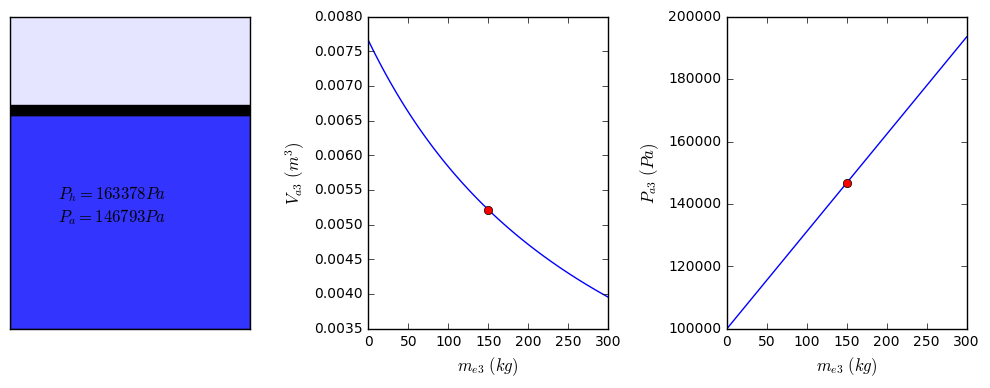

In [14]:
i = interact(embolo, m_e3=(0.01, 300))

### Resolviendo el Sistema con Sympy
El sistema de ecuaciones anterior se puede resolver con la librería de cálculo simbólico **Sympy**. A continuación se realiza el proceso de solución de $m_e$ que hace que la esfera flote.

Así pues, se tiene:

**Ec 1:** $P_{a_2} = P_\infty + m_e·\frac{g}{A_c}$

**Ec 2:** $P_{h_2} = P_{a_2} + K·(\phi_{h_2} - \phi_{h_0})$

**Ec 3:** $P_{h_2}·\frac{\pi}{6}\phi_{h_2}³=m_h·R_h·T_{h_2}$

**Ec 4:** $\frac{P_{a_2}}{R_a·T_{a_2}}·\frac{\pi}{6}\phi³_{h_2}·g = (m_h + m_g)·g$


Como el diámetro del globo se presenta al cubo en las ecuaciones 3 y 4, se tienen 3 soluciones del sistema anterior (en concreto 2 soluciones reales y 1 solución imaginaria con su complejo conjugado). Téngase en cuenta que sólo una solución es físicamente viable, por lo que habrá que descartar las soluciones que planteen números complejos o presiones negativas. Con ello, la solucion obtenida es muy cercana a la aproximación propuesta más arriba.

**Nota:** *Para acelerar el proceso se podría pasar al solve() las mismas expresiones que en el bucle anterior, de manera que se resuelva un sistema de 2 ecuaciones en lugar de 4*

In [15]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [16]:
P_a2, m_e, P_h2, phi_h2= symbols('P_a2 m_e P_h2 phi_h2')


In [17]:
bf1 = Eq( (P_a2 - P_inf)*A_c/grav, m_e) #Balance de Fuerzas al émbolo

In [18]:
bf2 = Eq( (P_a2 +K*(phi_h2 - phi_h0)), P_h2) 

In [19]:
fl = Eq(R_a*T_inf*(m_h+m_g)/(np.pi/6*phi_h2**3), P_a2)

In [20]:
eeh = Eq(m_h*R_h*T_inf/P_h2/np.pi*6, phi_h2**3)

**Nota: ** *La celda que soluciona el sistema de ecuaciones a continuación puede tardar un poco*

In [ ]:
sol = solve([bf1, bf2, fl, eeh],( m_e, P_h2, P_a2, phi_h2))

In [ ]:
for ii, solucion in enumerate(sol):
    print('Solución nº {}'.format(ii+1), solucion)

In [ ]:
print('Solución (Sympy):')
print('                  m_e={0:3.5f}kg'.format(sol[1][0]))
print('                  P_h2={0:6.0f}Pa'.format(sol[1][1]))
print('                  P_a2={0:6.0f}Pa'.format(sol[1][2]))
print('                  phi_h2={0:0.5f}m\n'.format(sol[1][3]))
print('Solución (Aproximación):')
print('                  m_e={0:3.5f}kg'.format(m_e_))
print('                  P_h2={0:6.0f}Pa'.format(P_h2_))
print('                  P_a2={0:6.0f}Pa'.format(P_a2_))
print('                  phi_h2={0:0.5f}m'.format(phi_h2_))

Los resultados obtenidos para la aproximación numérica iterativa corresponden a una $m_e=32.90kg$. Téngase en cuenta que el incremento entre iteraciones es de $\Delta m_e=0.05kg$ con lo que no se podría obtener una aproximación de menor precisión que $\Delta m_e$.

Si se rehace el bucle en que se resuelve $m_e$ cambiando a $\Delta m_e=0.005kg$ se puede conseguir $m_e=32.870kg$ como nueva solución a costa de más número de iteraciones.